<a href="https://colab.research.google.com/github/jixaw31/marketplace/blob/master/MyTorchVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [ ]:
from torchvision import datasets

train_data = datasets.FashionMNIST(root = 'data',
                                   train= True,
                                   transform = torchvision.transforms.ToTensor(),
                                   target_transform=None, download= True)

test_data = datasets.FashionMNIST(root = 'data',
                                   train= False,
                                   transform = torchvision.transforms.ToTensor(),
                                   target_transform=None, download= True)


100%|██████████| 26421880/26421880 [00:01<00:00, 16288317.66it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 309348.00it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5476912.28it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 1451874.46it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)
train_data_0 = train_data[0]
train_data_0[0]
image, label = train_data_0
image, label
train_data_0
train_data.classes
train_data.class_to_idx
train_data.targets
image.size(), label
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

(<matplotlib.image.AxesImage at 0x79cd9f659a50>, torch.Size([28, 28]))

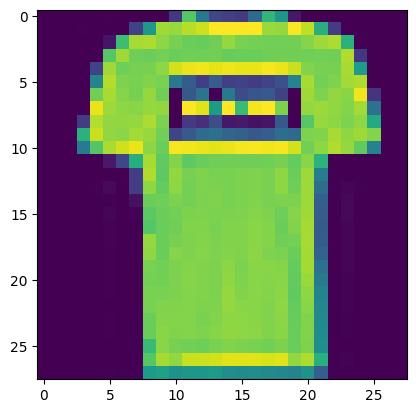

In [ ]:
# train_data = train_data[1]
image, label = train_data[1]

# image_permuted = torch.permute(image, (1 ,2 ,0))
# plt.imshow(image_permuted)
plt.imshow(image.squeeze()), image.squeeze().shape

(-0.5, 27.5, 27.5, -0.5)

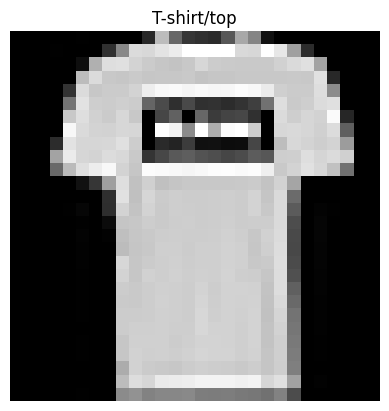

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)


In [ ]:
# plot more images
# torch.manual_seed(42)
# fig = plt.figure(figsize=(9, 9))
# rows, cols = 4, 4
# for i in range(1, rows*cols + 1):
#     random_idx = torch.randint(0, len(train_data), size=[1]).item()
#     # print(random_idx)
#     image, label = train_data[random_idx]
#     fig.add_subplot(rows, cols, i)
#     plt.imshow(image.squeeze(), cmap='gray')
#     plt.title(class_names[label])
#     plt.axis(False)

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)
# images, labels = next(iter(train_dataloader))
# print(f"Feature batch shape: {images.size()}")
# print(f"Labels batch shape: {labels.size()}")
# print(f"number of batches: {len(train_dataloader)}")
# img = images[0].squeeze()
# label = labels[0]
# plt.imshow(img, cmap="gray")
# plt.axis(False)
# plt.title(class_names[label])
# plt.show()
# print(f"Label: {class_names[label]}")






In [ ]:
# train_features_batch, train_labels_batch = next(iter(train_dataloader))
# print(train_features_batch.shape, train_labels_batch.shape)
# # torch.manual_seed(42)
# random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
# img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
# plt.imshow(img.squeeze(), cmap="gray")
# plt.axis(False)
# plt.title(class_names[label])
# plt.show()

In [ ]:
# input = torch.randn(32, 1, 5, 5)
# # print(input.size())
# flatten_0 = nn.Flatten()
# flatten_1 = nn.Flatten(0, 2)
# output = flatten_0(input)
# output_1 = flatten_1(input)
# print(output.size(),output_1.size())
# input = train_features_batch[0]
# input.shape
# flatten_model = nn.Flatten()
# output = flatten_model(input)
# output.shape

In [ ]:
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape:int,
                 hidden_units:int,
                 output_shape:int) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape,
                      out_features = hidden_units),
            nn.Linear(in_features= hidden_units,
                      out_features = output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
class FashionMNISTModel_1(nn.Module):
    def __init__(self, input_shape:int,
                 hidden_units:int,
                 output_shape:int) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape,
                      out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features= hidden_units,
                      out_features = output_shape),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
model_MNIST_0 = FashionMNISTModel(
    input_shape = 784,
    hidden_units = 10,
    output_shape =len(class_names)
).to('cpu')
model_MNIST_0
# with torch.inference_mode():
#     y_pred = model_MNIST_0()

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
model_1 = FashionMNISTModel_1(input_shape = 784,
                              hidden_units= 10,
                              output_shape = len(class_names))

# next(model_1.parameters()).device

In [ ]:
with torch.inference_mode():
    dummy_x = torch.rand(32, 1, 28, 28)
    y_logits = model_MNIST_0(dummy_x)
    # print(y_logits)


In [ ]:
model_MNIST_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0319,  0.0278, -0.0188,  ..., -0.0305,  0.0010, -0.0203],
                      [ 0.0085,  0.0154,  0.0233,  ..., -0.0020,  0.0311, -0.0142],
                      [-0.0084,  0.0183,  0.0352,  ..., -0.0057, -0.0174, -0.0151],
                      ...,
                      [ 0.0204,  0.0035, -0.0166,  ...,  0.0257,  0.0232,  0.0343],
                      [-0.0137,  0.0082, -0.0170,  ..., -0.0007,  0.0316, -0.0118],
                      [-0.0207,  0.0171, -0.0302,  ...,  0.0100, -0.0331,  0.0018]])),
             ('layer_stack.1.bias',
              tensor([ 0.0222, -0.0017, -0.0268,  0.0106,  0.0166,  0.0311, -0.0347,  0.0280,
                      -0.0354, -0.0060])),
             ('layer_stack.2.weight',
              tensor([[-0.2244, -0.0737, -0.0149,  0.0721, -0.0484,  0.1648,  0.0230, -0.1600,
                        0.1750,  0.1748],
                      [ 0.1021,  0.0595, -0.1041, -0.2410,  0.1935,  0.0400,  0.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:

# loss & optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_MNIST_0.parameters(), lr = 0.1)
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

In [ ]:
# loss & optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr = 0.1)
optimizer_0 = torch.optim.SGD(model_MNIST_0.parameters(), lr = 0.1)


In [ ]:
from timeit import default_timer as  timer
def print_train_time(start: float,
                    end: float,
                    device: torch.device = None):
    time_difference = end - start
    print(f"train time on device : {device}, {time_difference:.3f}")

start_time = timer()
#  the code we wanna calculate the time..
end_time = timer()
print_train_time(start_time, end_time, device='cpu')


train time on device : cpu, 0.000


In [ ]:
# model_MNIST_0.to('cuda')
model_MNIST_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0319,  0.0278, -0.0188,  ..., -0.0305,  0.0010, -0.0203],
                      [ 0.0085,  0.0154,  0.0233,  ..., -0.0020,  0.0311, -0.0142],
                      [-0.0084,  0.0183,  0.0352,  ..., -0.0057, -0.0174, -0.0151],
                      ...,
                      [ 0.0204,  0.0035, -0.0166,  ...,  0.0257,  0.0232,  0.0343],
                      [-0.0137,  0.0082, -0.0170,  ..., -0.0007,  0.0316, -0.0118],
                      [-0.0207,  0.0171, -0.0302,  ...,  0.0100, -0.0331,  0.0018]])),
             ('layer_stack.1.bias',
              tensor([ 0.0222, -0.0017, -0.0268,  0.0106,  0.0166,  0.0311, -0.0347,  0.0280,
                      -0.0354, -0.0060])),
             ('layer_stack.2.weight',
              tensor([[-0.2244, -0.0737, -0.0149,  0.0721, -0.0484,  0.1648,  0.0230, -0.1600,
                        0.1750,  0.1748],
                      [ 0.1021,  0.0595, -0.1041, -0.2410,  0.1935,  0.0400,  0.

In [ ]:
# from tqdm.auto import tqdm

# torch.manual_seed(42)
# train_time_start_cpu = timer()
# epochs = 2
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch : {epoch}\n-------")
#     model_MNIST_0.train()
#     train_loss = 0
#     for batch, (X, y) in enumerate(train_dataloader):
#         # X, y = X.to('cuda'), y.to('cuda')
#         y_pred = model_MNIST_0(X)
#         loss = loss_fn(y_pred, y)
#         train_loss += loss
#         optimizer_0.zero_grad()
#         loss.backward()
#         optimizer_0.step()
#         if batch % 400 == 0:
#             print(f"looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")
#     train_loss /= len(train_dataloader)

#     test_loss, test_acc = 0, 0
#     model_MNIST_0.eval()
#     with torch.inference_mode():
#         for X_test, y_test in test_dataloader:
#             # X_test, y_test = X_test.to('cuda'), y_test.to('cuda')
#             test_pred = model_MNIST_0(X_test)
#             test_loss = loss_fn(test_pred, y_test)
#             test_loss += test_loss
#             test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

#         test_loss /= len(test_dataloader)
#         test_acc /= len(test_dataloader)
#     print(f"train loss : {train_loss:.4f} | test loss : {test_loss:.4f} | test accuracy : {test_acc:.4f}")
#     # print(f"train loss : {train_loss:.4f} | ")

# train_time_end_cpu = timer()
# print_train_time(train_time_start_cpu, train_time_end_cpu, device=str(next(model_MNIST_0.parameters()).device))

In [ ]:
# from tqdm.auto import tqdm

# torch.manual_seed(42)
# train_time_start = timer()

# epochs = 3
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch : {epoch}\n-------")
#     model_1.train()
#     train_loss = 0
#     for batch, (X, y) in enumerate(train_dataloader):
#         # X, y = X.to('cuda'), y.to('cuda')
#         y_pred = model_1(X)
#         loss = loss_fn(y_pred, y)
#         train_loss += loss
#         optimizer_1.zero_grad()
#         loss.backward()
#         optimizer_1.step()
#         if batch % 400 == 0:
#             print(f"looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")
#     train_loss /= len(train_dataloader)

#     test_loss, test_acc = 0, 0
#     model_1.eval()
#     with torch.inference_mode():
#         for X_test, y_test in test_dataloader:
#             # X_test, y_test = X_test.to('cuda'), y_test.to('cuda')
#             test_pred = model_1(X_test)
#             test_loss = loss_fn(test_pred, y_test)
#             test_loss += test_loss
#             test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

#         test_loss /= len(test_dataloader)
#         test_acc /= len(test_dataloader)
#     print(f"train loss : {train_loss:.4f} | test loss : {test_loss:.4f} | test accuracy : {test_acc:.4f}")
#     # print(f"train loss : {train_loss:.4f} | ")

# train_time_end = timer()
# print_train_time(train_time_start, train_time_end, device=str(next(model_MNIST_0.parameters()).device))

In [ ]:
# torch.save(model_1.state_dict(), Path('/content/drive/MyDrive/my models/model_non_linear_mnist_1_1.pth'))

Ankle boot


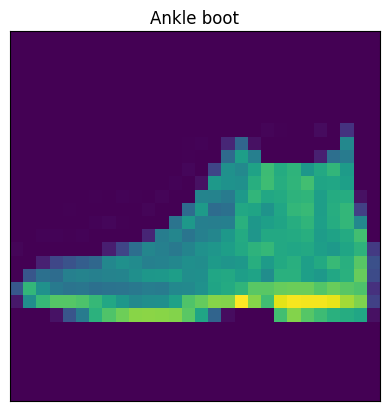

In [ ]:
loaded_model_1_1 = FashionMNISTModel_1(input_shape=784, hidden_units=10,
                            output_shape=len(class_names))
loaded_model_1_1.load_state_dict(torch.load(Path('/content/drive/MyDrive/my models/model_non_linear_mnist_1_1.pth')))
X_test, y_test = next(iter(test_dataloader))
loaded_model_1_1.eval()
with torch.inference_mode():
    y_pred = loaded_model_1_1(X_test[0])
print(class_names[int(torch.argmax(y_pred))])
fig = plt.imshow(X_test[0].squeeze());plt.title(f"{class_names[int(y_test[0])]}")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)


In [ ]:
X_test, y_test = next(iter(test_dataloader))

In [ ]:
# model_1_time = train_time_end - train_time_start

# model_1_time

In [ ]:
# from pathlib import Path
# Path('my models').mkdir(parents=True, exist_ok=True)
# torch.save(obj = model_1.state_dict(), f=Path('drive/MyDrive/my models')/'strange_model_1.pth')

In [ ]:
# a function to evaluate
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn :torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # X, y = X.to('cuda'), y.to('cuda')
            test_pred = model(X)
            loss += loss_fn(test_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name': model.__class__.__name__,
            'model_loss': loss.item(),
            'model_acc': acc}








In [ ]:
# lets create a function for training/testing loop
from tqdm.auto import tqdm
def train_step(model: torch.nn.Module,
                    data_loader: torch.utils.data.DataLoader,
                    loss_fn: torch.nn.Module,
                    optimizer: torch.optim.Optimizer,
                    accuracy_fn,
                    device:torch.device):
    train_acc, train_loss = 0, 0
    model.train()
    for i, (X, y) in enumerate(data_loader):
        # X, y = X.to('cuda'), y.to('cuda')

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 400 == 0:
            print(f"looked at {i * len(X)} / {len(data_loader.dataset)} samples")
    train_acc /= len(data_loader)
    train_loss /= len(data_loader)
    print(f"train_loss:{train_loss:.5f} | train acc : {train_acc:.2f} %")

# train_step(model_1,
#            train_dataloader,
#            loss_fn,
#            optimizer_1,
#            accuracy_fn,
#            device='cpu' )# or 'cuda' if available

In [ ]:
# for batch, (X, y) in enumerate(train_dataloader):
#     print(X.size(), y.size()) if batch < 10 else None
# #


In [ ]:
class FashionMNISTModel_3(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # gives 10x49
            nn.Linear(in_features = hidden_units * 49, out_features=len(class_names)),
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x




In [ ]:
class FashionMNISTModel_4(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(

            # torch.permute(nn.Flatten(), (1, 0)),
            nn.Flatten(0, -1),
            # gives 10x49
            nn.Linear(in_features = hidden_units * 49, out_features=len(class_names)),
            nn.Flatten(0, -1)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        return x



In [ ]:
torch.manual_seed(42)
model_cnn_0 = FashionMNISTModel_4(input_shape = 1,
                                  hidden_units = 10,
                                  output_shape = len(class_names))

model_cnn_0(image)

# model_cnn_0(image.unsqueeze(0)).shape

torch.Size([10, 14, 14])
torch.Size([10, 7, 7])


tensor([ 0.0402, -0.0687,  0.0542, -0.0376, -0.0009,  0.0209, -0.0018, -0.0198,
         0.0321,  0.0022], grad_fn=<ViewBackward0>)

In [ ]:
images = torch.randn(size=(32, 3, 64, 64))
image_0 = images[0]
# image_0 = image_0.unsqueeze(dim = 0)
images.shape, image_0.shape
print(f"Image batch shape: {images.shape}")
print(f"First image shape: {image_0.shape}")


Image batch shape: torch.Size([32, 3, 64, 64])
First image shape: torch.Size([3, 64, 64])


In [ ]:

conv_layer = nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 3, stride=1, padding=1)

conv_output = conv_layer(image_0)

image_0.shape, conv_output.shape

(torch.Size([3, 64, 64]), torch.Size([10, 64, 64]))

In [ ]:
# lets see what maxpool2d does!
max_pool_layer = nn.MaxPool2d(kernel_size = 2, stride=None,
                              padding=0)
maxPool_output = max_pool_layer(conv_output)
maxPool_output.shape

torch.Size([10, 32, 32])

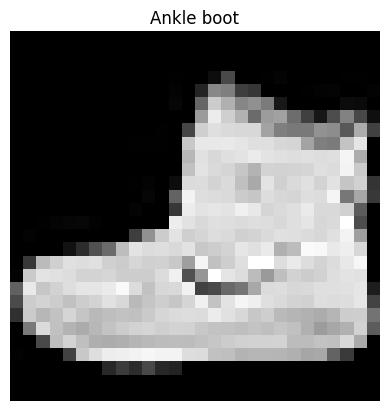

In [ ]:
images, label = next(iter(train_dataloader))
images[0].size(), label[0]
class_names[label[9]]
# image_permuted = torch.permute(image, (1, 2, 0))
# plt.imshow(image_permuted, cmap='gray')
plt.imshow(torch.permute(images[0], (1, 2, 0)), cmap='gray')
plt.axis(False)
plt.title(class_names[label[0]])
plt.show()
# plt.title(class_names[label])

# image_0_permuted = torch.permute(image_0, (1, 2, 0))
# label
# plt.imshow(image_0_permuted)
# image_0_permuted.shape, image_permuted.shape
# image_0_permuted[1, 20, 0]
# couldn't use imshow for RGB images

In [ ]:
torch.manual_seed(42)
model_cnn_1 = FashionMNISTModel_3(input_shape = 1,
                                  hidden_units = 10,
                                  output_shape = len(class_names))



# unsqueezed_image = image.unsqueeze(0)
# unsqueezed_image.size()
# model_cnn_1(image_0_permuted_unsqueezed)
# expected input[1, 28, 28, 1]
# image_0_permuted_unsqueezed = image_0_permuted.unsqueeze(0)
# image_permuted_unsqueezed = image_permuted.unsqueeze(0)
# image_permuted_unsqueezed.shape
# image_0_permuted_unsqueezed.shape
with torch.inference_mode():
    result = model_cnn_1(image.unsqueeze(0))

result, result.shape


(tensor([[ 0.0402, -0.0687,  0.0542, -0.0376, -0.0009,  0.0209, -0.0018, -0.0198,
           0.0321,  0.0022]]),
 torch.Size([1, 10]))

In [ ]:
# setup loss_fn/optimizer/accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer_cnn_1 = torch.optim.SGD(model_cnn_1.parameters(), lr = 0.1)
from helper_functions import accuracy_fn


In [ ]:
# torch.manual_seed(42)
# from tqdm.auto import tqdm
# from timeit import default_timer as timer
# time_start = timer()
# for epoch in tqdm(range(1)):
#     train_step(model_cnn_1,
#             train_dataloader,
#             loss_fn,
#             optimizer_cnn_1,
#             accuracy_fn,
#             device='cpu' )# or 'cuda' if available
# time_end = timer()


In [ ]:
# time_model_cnn_1 = time_end-time_start
# print(time_model_cnn_1)

In [ ]:
from pathlib import Path
# MODEL_PATH = Path('models')
# MODEL_PATH.mkdir(parents=True, exist_ok=True)
Path('models').mkdir(parents=True, exist_ok=True)
# MODEL_NAME = 'conv_model_1.pth'
# MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj = model_cnn_1.state_dict(), f=Path('models')/'conv_model_1.pth')

In [ ]:
# model_cnn_1(images[0].unsqueeze(0).argmax(dim=1)) , class_names
print(int(torch.argmax(model_cnn_1(images[3].unsqueeze(0)))))
class_names[int(torch.argmax(model_cnn_1(images[3].unsqueeze(0))))]

2


'Pullover'

In [ ]:
# from pathlib import Path
# # MODEL_PATH = Path('models')
# # MODEL_PATH.mkdir(parents=True, exist_ok=True)
# Path('models').mkdir(parents=True, exist_ok=True)
# # MODEL_NAME = 'conv_model_1.pth'
# # MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# torch.save(obj = model_cnn_1.state_dict(), f=Path('models')/'loaded_model_3.pth')

In [ ]:
loaded_model_1 = FashionMNISTModel_3(input_shape = 1,
                                    hidden_units = 10,
                                    output_shape = len(class_names))
loaded_model_1.load_state_dict(torch.load(Path('models')/'conv_model_1.pth'))
loaded_model_1.eval()
with torch.inference_mode():
    print(int(torch.argmax(loaded_model_1(images[20].unsqueeze(0)))))
    print(class_names[int(torch.argmax(model_cnn_1(images[20].unsqueeze(0))))])
class_names

2
Pullover


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

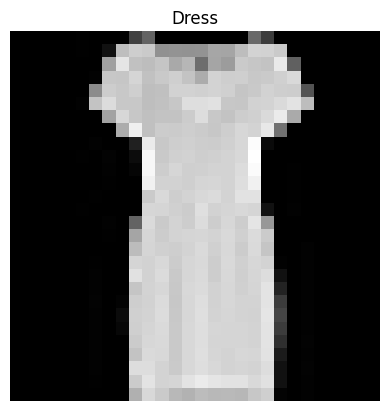

In [ ]:
images, label = next(iter(train_dataloader))
images[0].size(), label[0]
class_names[label[9]]
# image_permuted = torch.permute(image, (1, 2, 0))
# plt.imshow(image_permuted, cmap='gray')
plt.imshow(torch.permute(images[20], (1, 2, 0)), cmap='gray')
plt.axis(False)
plt.title(class_names[label[20]])
plt.show()

In [ ]:
model_cnn_1.load_state_dict(torch.load(Path('/content/drive/MyDrive/my models/conv_model_1.pth')))


<All keys matched successfully>

In [ ]:
model_2_results = eval_model(model_cnn_1,
                                 test_dataloader,
                                 loss_fn,
                                 accuracy_fn)
model_1_results = eval_model(loaded_model_1_1, test_dataloader, loss_fn, accuracy_fn)

with torch.inference_mode():
    print(model_2_results)
    print(model_1_results)




  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_3', 'model_loss': 0.4098292291164398, 'model_acc': 85.09384984025559}
{'model_name': 'FashionMNISTModel_1', 'model_loss': 0.6991605162620544, 'model_acc': 80.27156549520767}


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_2_results, model_1_results])

# compare_results['time'] = [time_model_cnn_1, model_1_time]
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel_3,0.409829,85.093850
1,FashionMNISTModel_1,0.699161,80.271565


<Axes: ylabel='model_name'>

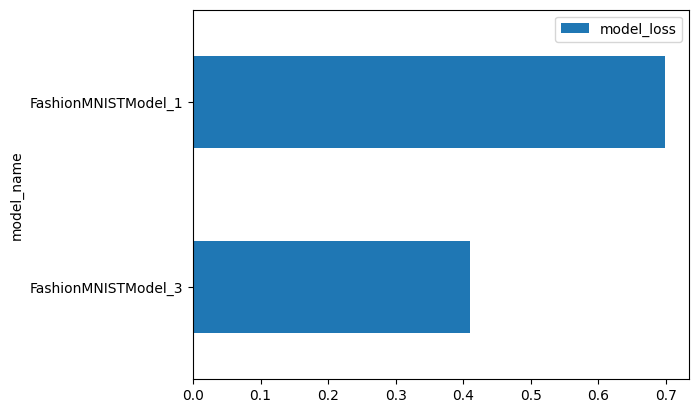

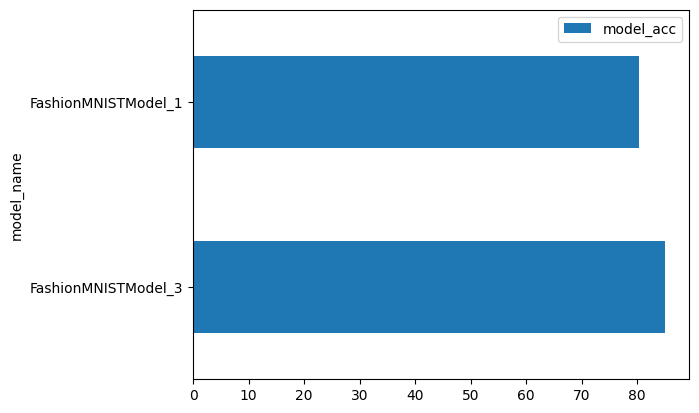

In [ ]:
import matplotlib.pyplot as plt


compare_results.plot(x="model_name", y="model_loss", kind="barh")
compare_results.plot(x="model_name", y="model_acc", kind="barh")

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device):
    pred_probs = []
    # model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim = 0)
            pred_logit = model(sample)
            # print(pred_logit)
            pred_prob = torch.softmax(pred_logit, dim=1)
            pred_probs.append(pred_prob)

    return torch.stack(pred_probs)


In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)


len(test_samples)




9

In [ ]:
predictions = make_predictions(model_cnn_1,
                     test_samples,
                     'cpu')
predictions[:2]
int(torch.argmax(predictions[0])), int(torch.argmax(predictions[1]))
class_names[5], class_names[1]

('Sandal', 'Trouser')

Text(0.5, 1.0, 'Trouser')

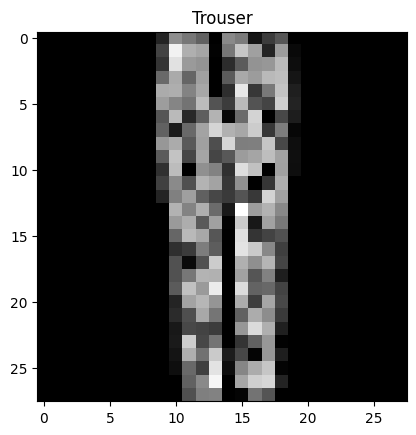

In [ ]:
plt.imshow(test_samples[1].squeeze(), cmap='gray')
plt.title(class_names[test_labels[1]])

# plt.imshow(image.squeeze(), cmap='gray')
# plt.title(class_names[label])
# # plt.axis(False)


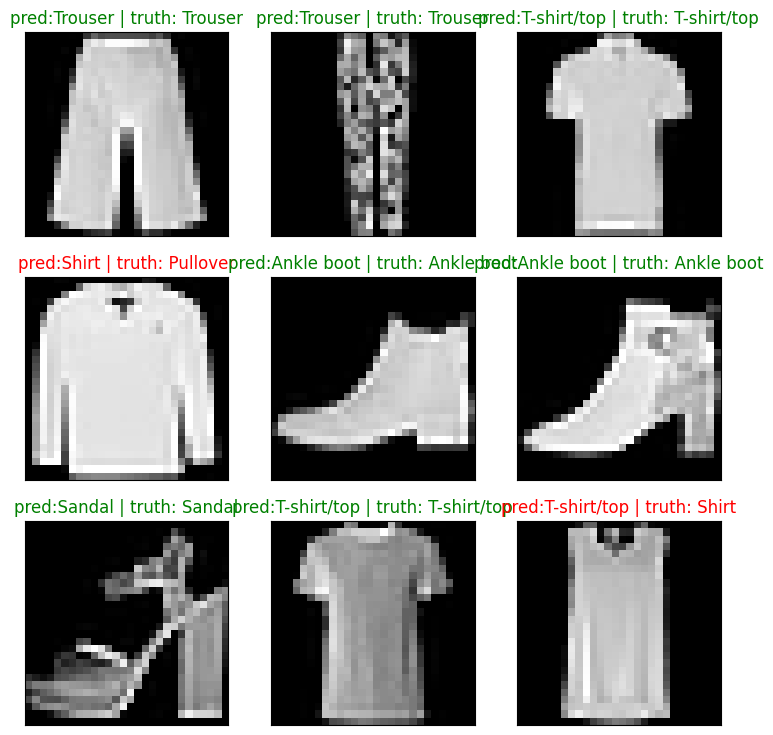

In [ ]:
plt.figure(figsize=(9, 9))
nrows, ncols = 3, 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    ax = plt.imshow(sample.squeeze(), cmap='gray')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if int(torch.argmax(predictions[i])) == test_labels[i]:
        plt.title(f"pred:{class_names[int(torch.argmax(predictions[i]))]} | truth: {class_names[test_labels[i]]}", c='g')
    else:
        plt.title(f"pred:{class_names[int(torch.argmax(predictions[i]))]} | truth: {class_names[test_labels[i]]}", c='r')


# fig = plt.imshow(data)
#     fig.set_cmap('hot')
#     fig.axes.get_xaxis().set_visible(False)
#     fig.axes.get_yaxis().set_visible(False)

In [ ]:
y_preds = []
# y_logits = []
# y_logits_softmaxed = []
model_cnn_1.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='loading . . .'):
        y_logit = model_cnn_1(X)
        # y_logits.append(y_logit)
        # y_logit_softmaxed = torch.softmax(y_logit, dim=0)
        # y_logits_softmaxed.append(y_logit_softmaxed)
        # y_pred = torch.argmax(y_logit_softmaxed.squeeze(), dim=1)
        y_pred = torch.argmax(y_logit.squeeze(), dim=1)
        y_preds.append(y_pred)


# y_logits[0][0], y_logits_softmaxed[0][0]
# len(y_preds)
y_preds_tensor = torch.cat(y_preds)

y_preds_tensor[:10],

loading . . .:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 6, 1, 1, 6, 1, 4, 6, 5, 7]),)

In [ ]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [ ]:
pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 7.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import torchmetrics
torchmetrics.__version__

'1.3.2'

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(y_preds_tensor, test_data.targets)

confmat_tensor


tensor([[766,   0,  19,  53,   6,   1, 135,   0,  20,   0],
        [  3, 954,   0,  33,   6,   0,   2,   0,   2,   0],
        [  7,   0, 647,  14, 160,   0, 166,   0,   6,   0],
        [ 21,   3,   4, 912,  18,   0,  39,   0,   3,   0],
        [  1,   1,  48,  60, 770,   0, 118,   0,   2,   0],
        [  1,   0,   0,   2,   0, 952,   0,  25,   1,  19],
        [123,   0,  57,  48,  83,   1, 655,   0,  33,   0],
        [  0,   0,   0,   0,   0,  33,   0, 928,   0,  39],
        [  0,   1,   4,  11,   2,   2,   8,   5, 967,   0],
        [  0,   0,   0,   0,   0,   5,   0,  38,   1, 956]])

In [ ]:
confmat_tensor.dtype
confmat_tensor.numpy().dtype

dtype('int64')

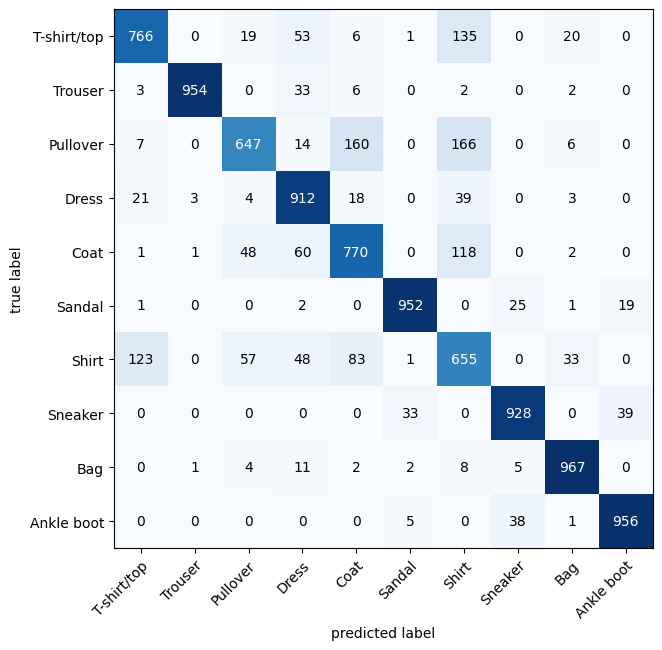

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize=(10, 7))


In [ ]:

torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(model_1_results['model_loss']))


# model_2_results, model_1_results

tensor(False)